# Chapter 2 Statistical Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
import numpy as np

## Exercise 8

8. This exercise relates to the College data set, which can be found in
the fle College.csv on the book website. It contains a number of
variables for 777 diferent universities and colleges in the US. The
variables are
• Private : Public/private indicator
• Apps : Number of applications received
• Accept : Number of applicants accepted
• Enroll : Number of new students enrolled
• Top10perc : New students from top 10 % of high school class
• Top25perc : New students from top 25 % of high school class
• F.Undergrad : Number of full-time undergraduates
• P.Undergrad : Number of part-time undergraduates
• Outstate : Out-of-state tuition
• Room.Board : Room and board costs
• Books : Estimated book costs
• Personal : Estimated personal spending
• PhD : Percent of faculty with Ph.D.s
• Terminal : Percent of faculty with terminal degree
• S.F.Ratio : Student/faculty ratio
• perc.alumni : Percent of alumni who donate
• Expend : Instructional expenditure per student
• Grad.Rate : Graduation rate
Before reading the data into Python, it can be viewed in Excel or a
text editor.

(a) Use the pd.read_csv() function to read the data into Python. Call
the loaded data college. Make sure that you have the directory
set to the correct location for the data.

In [4]:
college = pd.read_csv('/home/hinojosaad/repos/islp/datasets/College.csv')
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Look at the data used in the notebook by creating and running
a new cell with just the code college in it. You should notice
that the first column is just the name of each university in a
column named something like Unnamed: 0. We don’t really want
pandas to treat this as data. However, it may be handy to have
these names for later. Try the following commands and similarly
look at the resulting data frames:

In [5]:
college2 = pd.read_csv('/home/hinojosaad/repos/islp/datasets/College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
college3 = college3.set_index('College')

In [6]:
college2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [7]:
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [8]:
college=college3

(c) Use the describe() method of to produce a numerical summary
of the variables in the data set.

In [9]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(d) Use the pd.plotting.scatter_matrix() function to produce a
scatterplot matrix of the first columns [Top10perc, Apps, Enroll].
Recall that you can reference a list C of columns of a data frame
A using A[C].

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

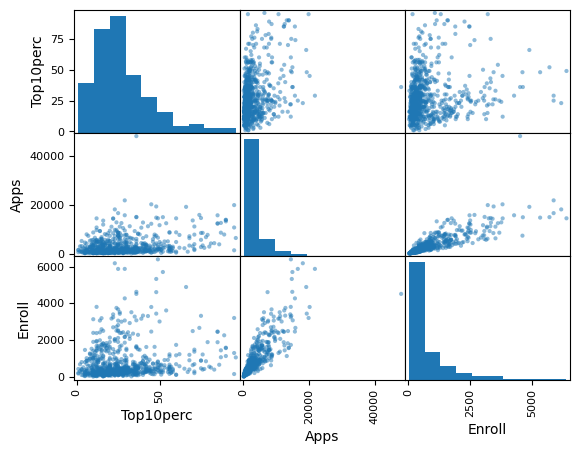

In [12]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps','Enroll']])

(e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

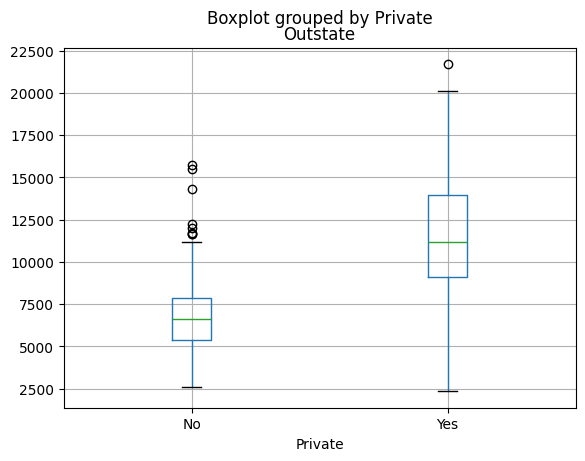

In [15]:
college.boxplot(column=['Outstate'], by='Private')

(f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%.

In [20]:
college['Elite'] = pd.cut(college['Top10perc'],[0,50,100],labels=['No', 'Yes'])

Use the value_counts() method of college['Elite'] to see how
many elite universities there are. Finally, use the boxplot() method
again to produce side-by-side boxplots of Outstate versus Elite.

In [21]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

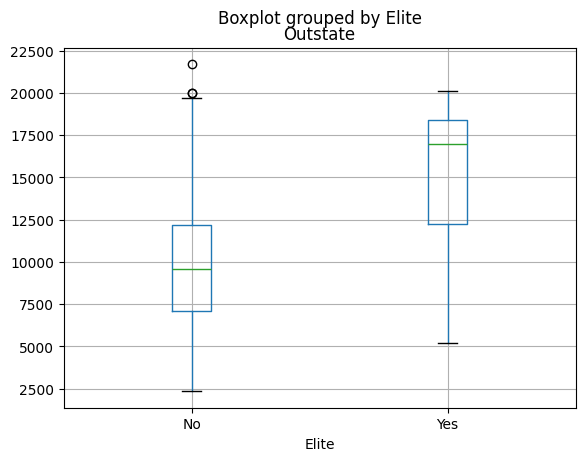

In [23]:
college.boxplot(column=['Outstate'], by='Elite');

(g) Use the plot.hist() method of college to produce some histograms
with differing numbers of bins for a few of the quantitative
variables. The command plt.subplots(2, 2) may be useful:
it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

In [24]:
college.columns.to_list()

['Private',
 'Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate',
 'Elite']

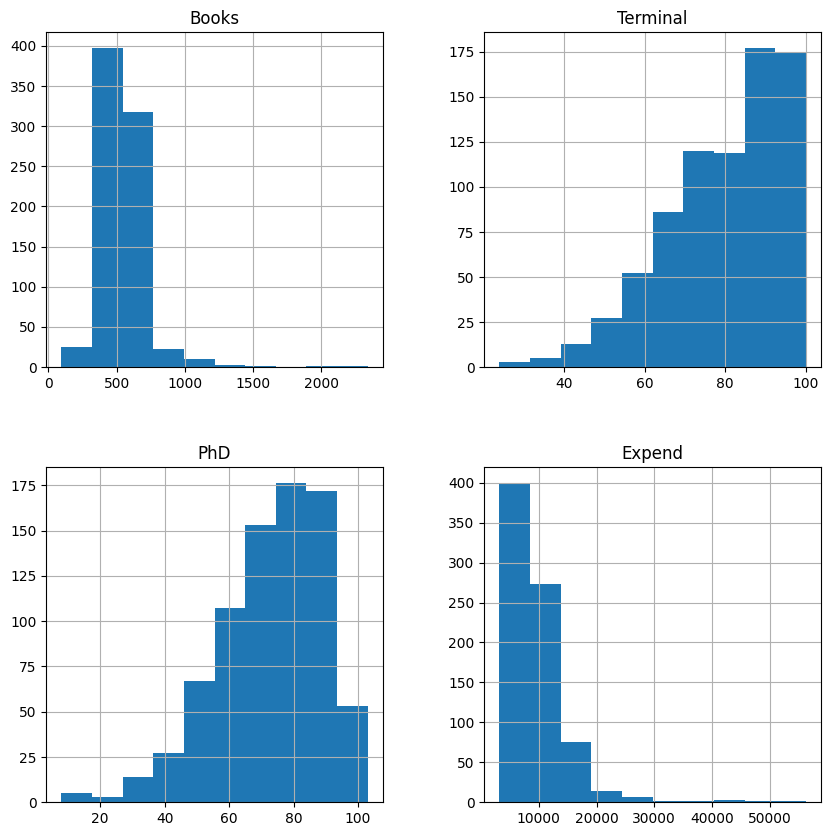

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
college.hist('Books',bins=10, ax=ax[0, 0])
college.hist('PhD',bins=10, ax=ax[1, 0])
college.hist('Terminal',bins=10, ax=ax[0, 1])
college.hist('Expend',bins=10, ax=ax[1, 1]);

## Exercise 9

9. This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.
(a) Which of the predictors are quantitative, and which are qualitative?


In [2]:
Auto  = load_data("Auto")
Auto= Auto.dropna()

In [3]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


Quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year
Qualitative: origin


(b) What is the range of each quantitative predictor? You can answer
this using the min() and max() methods in numpy.


In [5]:
for col in Auto.columns:
    if col != 'origin':
        r = np.max(Auto[col]) - np.min(Auto[col])
        print(f"{col}: {r}")

mpg: 37.6
cylinders: 5
displacement: 387.0
horsepower: 184
weight: 3527
acceleration: 16.8
year: 12


(c) What is the mean and standard deviation of each quantitative
predictor?


In [4]:
for col in Auto.columns:
    if col != 'origin':
        print(f"{col}")
        print(f"mean: {Auto[col].mean()}, std: {Auto[col].std()}")

mpg
mean: 23.445918367346938, std: 7.8050074865717995
cylinders
mean: 5.471938775510204, std: 1.7057832474527845
displacement
mean: 194.41198979591837, std: 104.64400390890466
horsepower
mean: 104.46938775510205, std: 38.49115993282849
weight
mean: 2977.5841836734694, std: 849.4025600429492
acceleration
mean: 15.541326530612244, std: 2.758864119188082
year
mean: 75.9795918367347, std: 3.6837365435778295


(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [13]:
Auto2= Auto.drop(Auto.index[10:85])
for col in Auto.columns:
    if col != 'origin':
        print(f"{col}")
        print(f"range :{np.max(Auto2[col]) - np.min(Auto2[col])}, mean: {Auto2[col].mean()}, std: {Auto2[col].std()}")

mpg
range :35.6, mean: 25.00602836879433, std: 7.92138412897426
cylinders
range :5, mean: 5.283687943262412, std: 1.6373150538451873
displacement
range :387.0, mean: 180.12056737588654, std: 96.16426302400993
horsepower
range :184, mean: 99.03900709219859, std: 34.19728043348203
weight
range :3197, mean: 2884.9397163120566, std: 793.2363726986813
acceleration
range :16.1, mean: 15.713120567375888, std: 2.601574566950688
year
range :12, mean: 77.48226950354609, std: 3.017394027492092


(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

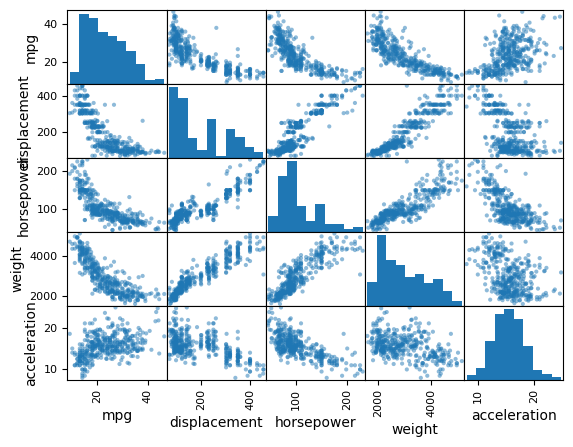

In [12]:
pd.plotting.scatter_matrix(Auto[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]);

- Linear relation: horsepower-displacement, weight-displacement, weight-horsepower
- Inverse linear relation: mpg-displacement, mpg-horsepower, mpg-weight

(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

Displacement, horsepower and weight maybe useful since there is an inverse linear relation

## Exercise 10

10. This exercise involves the Boston housing data set.
(a) To begin, load in the Boston data set, which is part of the ISLP
library.


In [42]:
Boston  = load_data("Boston")

(b) How many rows are in this data set? How many columns? What
do the rows and columns represent?


In [43]:
Boston.shape

(506, 13)

In [44]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


It containts 13 columns and 306 registers,each register is a neighborhoof from Boston.

The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

(c) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

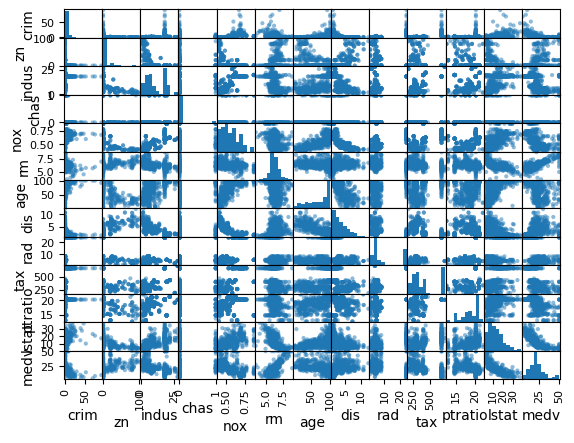

In [45]:
pd.plotting.scatter_matrix(Boston);

In total there are 72 possible pairwise relations, as we can se in the matric some of them seems to be interesting but I don't pretend to be exhaustive for example medv vs rm seems linearl (which is logical) and lstat vs medv inverse lineal (also logical).

(d) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

In [46]:
l=Boston.columns.to_list()

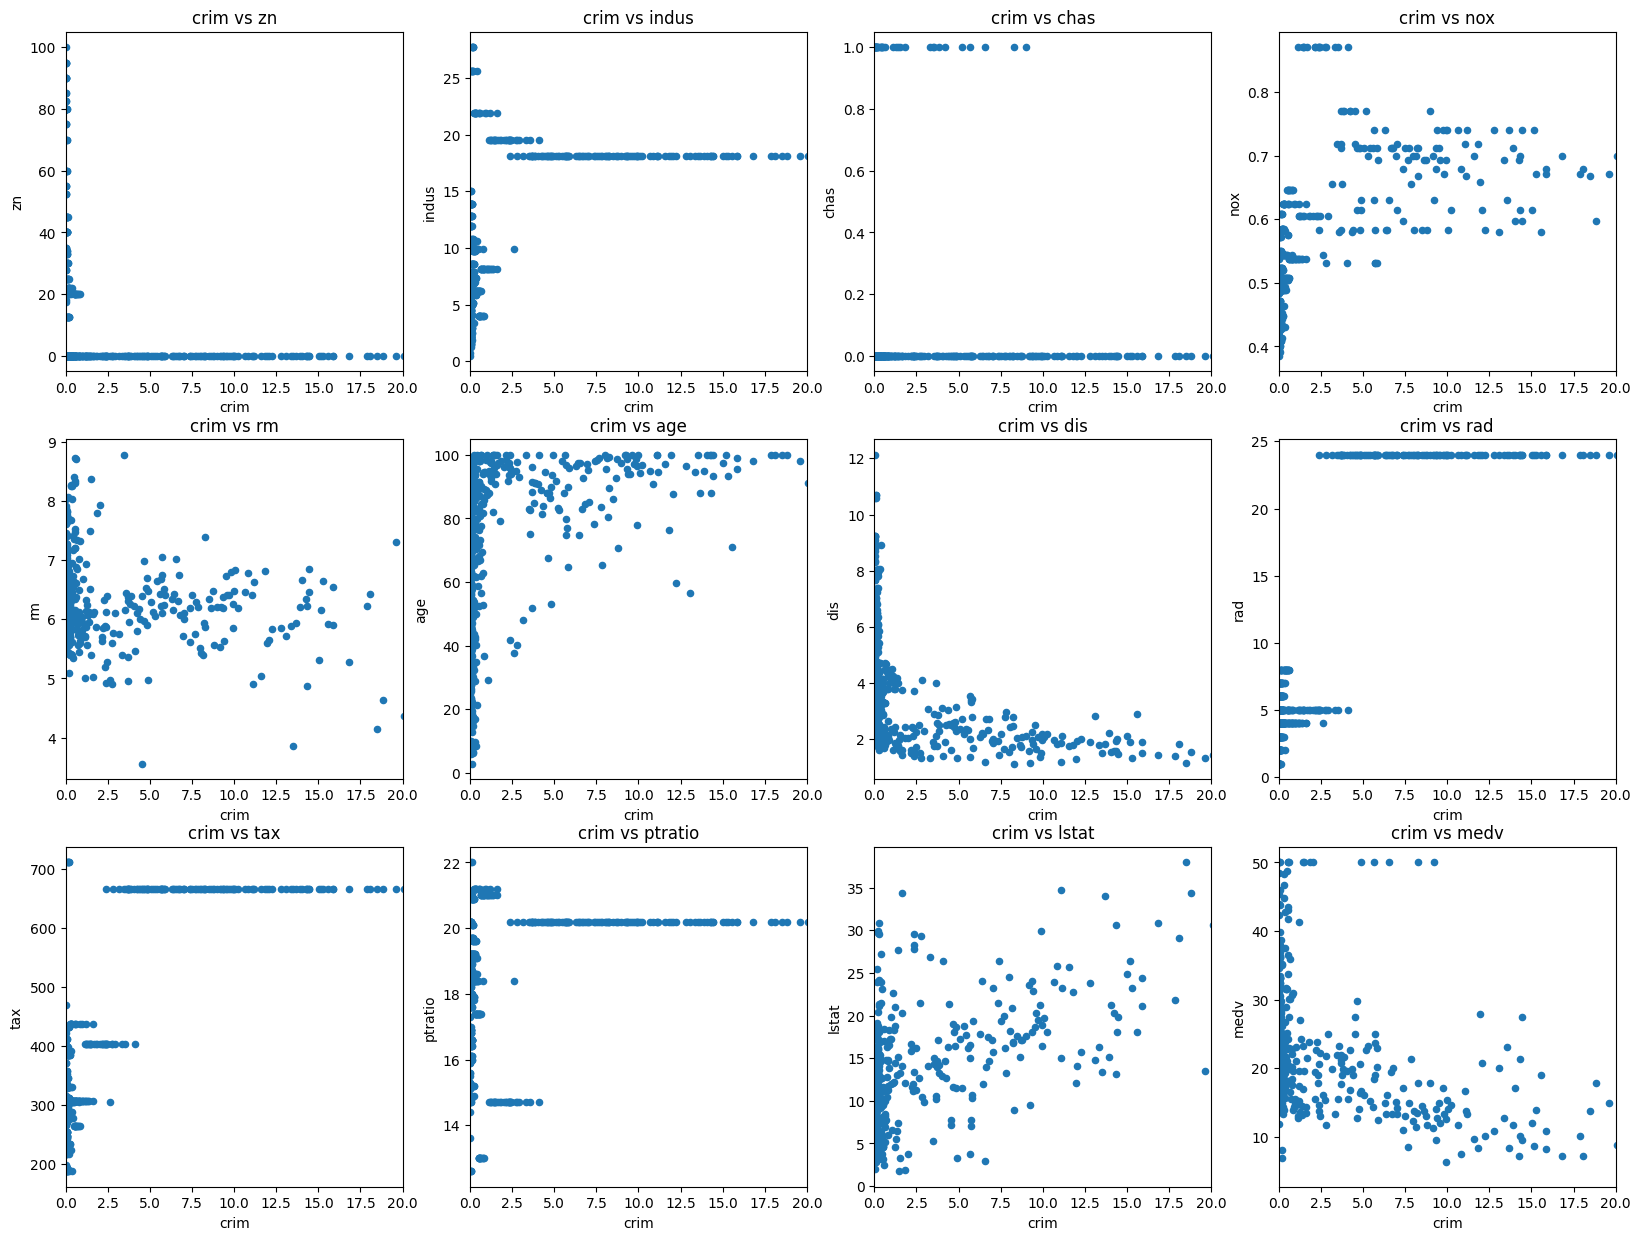

In [47]:
fix, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
for i in range(1, 13):
    
    ax = axes[(i-1) // 4,(i-1) % 4]
    Boston.plot.scatter(x=l[0], y=l[i], ax=ax)
    ax.set_title(f'{l[0]} vs {l[i]}')
    ax.set_xlim(0, 20) 

plt.show()

Most of the predictors are concentrated around 0 and then they I have an L form so I would sat that not really

(e) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.


In [48]:
Boston['crim'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
10%        0.038195
20%        0.064170
30%        0.099245
40%        0.150380
50%        0.256510
60%        0.550070
70%        1.728440
80%        5.581070
90%       10.753000
max       88.976200
Name: crim, dtype: float64

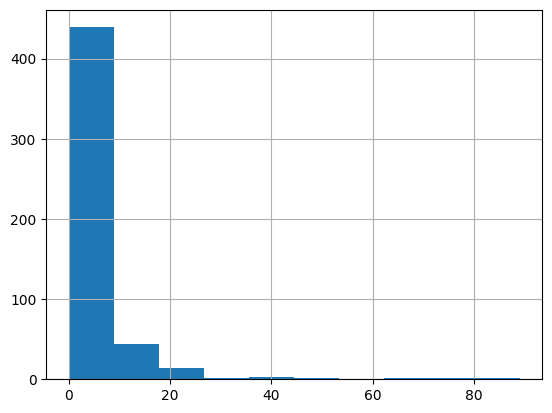

In [49]:
Boston['crim'].hist(bins=10);

Crime per capita: Yes there is an important quantity of neighborhoods with a big quantity of crimes per capita. The mean is 3.6. The percentiles 70,80, and 90 are 1.7, 5.5, and 10.75, showing an exponential increasing on a 30% of the neighborhoods.

In [50]:
Boston['tax'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
10%      233.000000
20%      273.000000
30%      289.000000
40%      307.000000
50%      330.000000
60%      398.000000
70%      437.000000
80%      666.000000
90%      666.000000
max      711.000000
Name: tax, dtype: float64

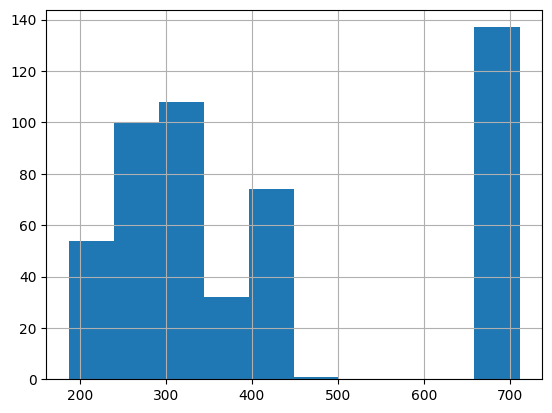

In [51]:
Boston['tax'].hist(bins=10);

Tax rate: We observe that approximatelly 20% of the neighborhoods pay a higher taxrate than the rest near 700.

In [52]:
Boston['ptratio'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
10%       14.750000
20%       16.600000
30%       17.800000
40%       18.400000
50%       19.050000
60%       19.700000
70%       20.200000
80%       20.200000
90%       20.900000
max       22.000000
Name: ptratio, dtype: float64

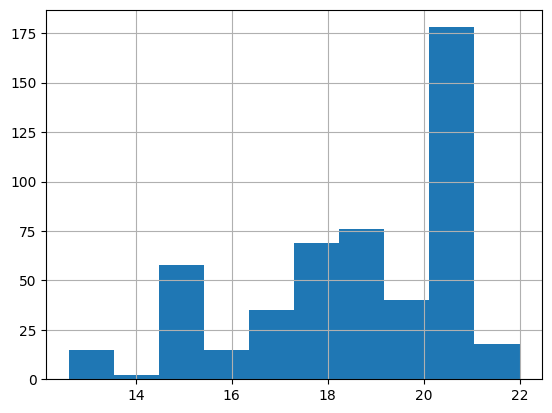

In [53]:
Boston['ptratio'].hist(bins=10);

There is not observed a big quantity of neighborhoods with a higher pupil-teacher ratio, most of the neighborhoods are concentrated near the mean, probably a 10% that has a lower ratio.

(f) How many of the suburbs in this data set bound the Charles
river?


In [54]:
Boston['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

35

(g) What is the median pupil-teacher ratio among the towns in this
data set?

In [55]:
Boston['ptratio'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

19.05

(h) Which suburb of Boston has lowest median value of owneroccupied
homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [56]:
Boston[Boston['medv'] == Boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


There are two neighborhoods with lowest median value, we make some boxplot to compare its disttibution with the rest.

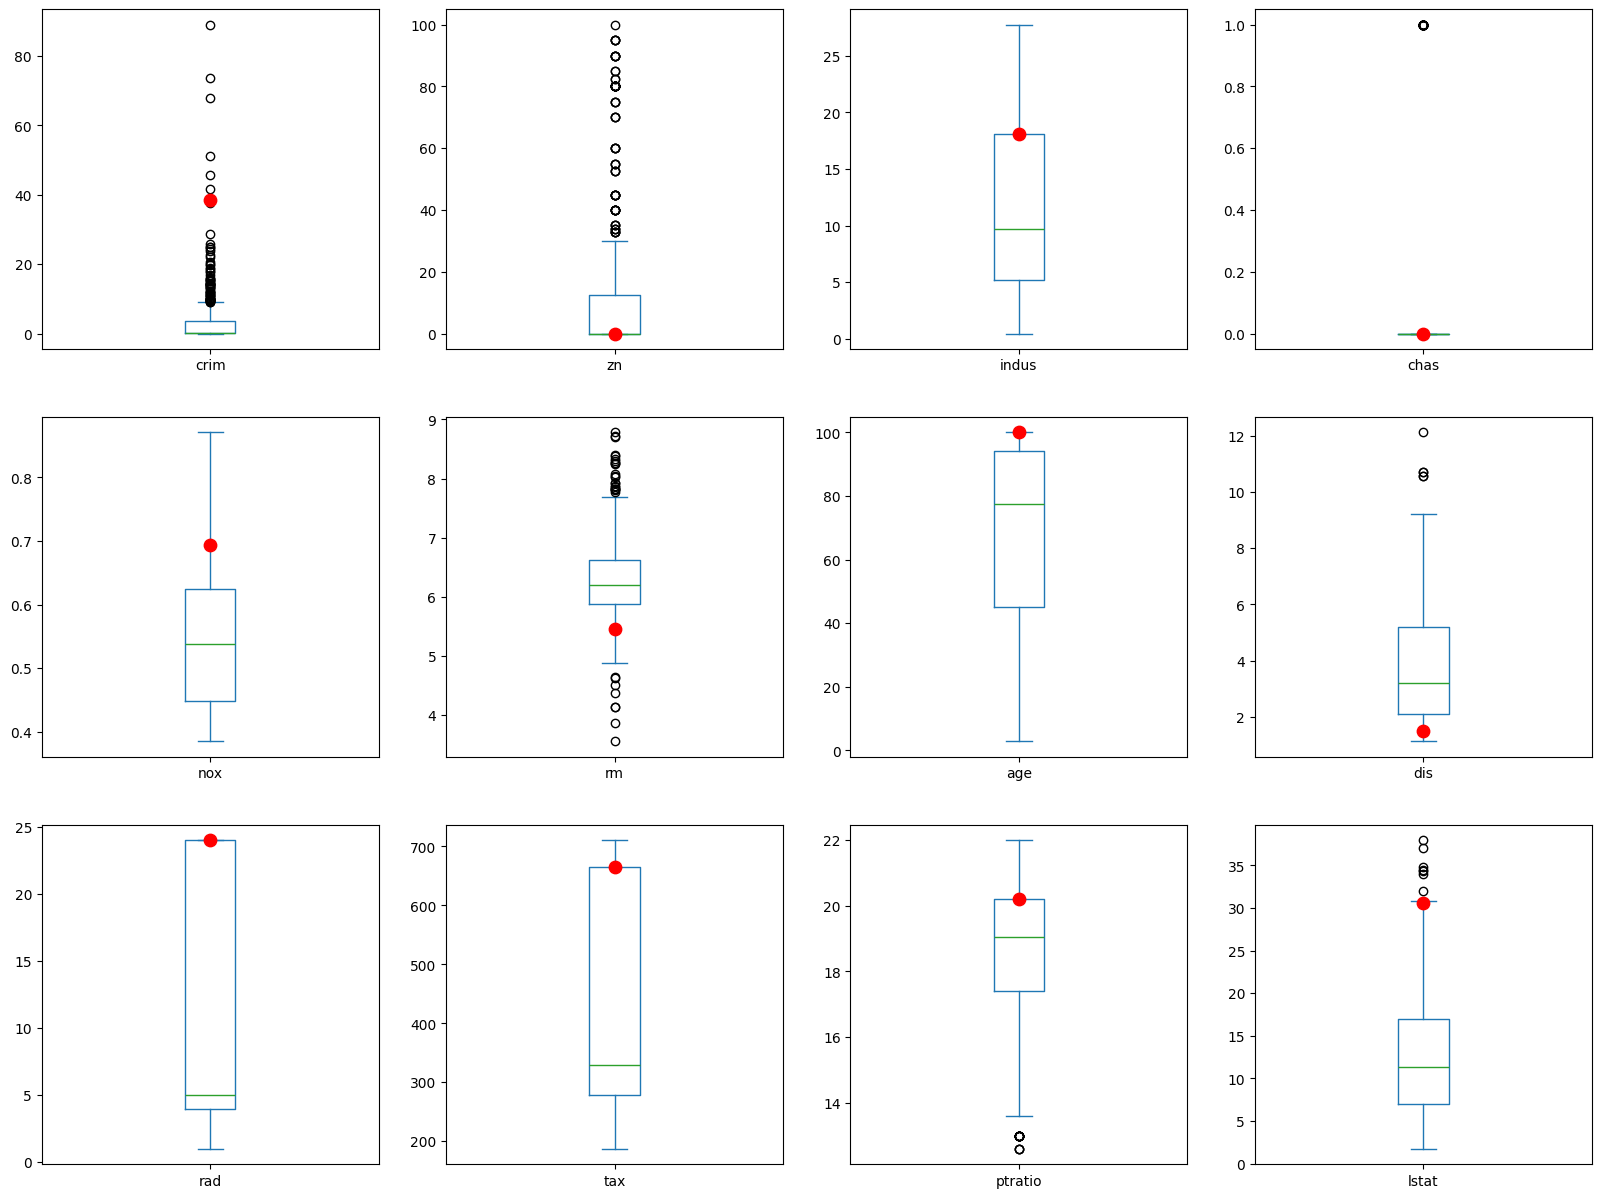

In [65]:
fix, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
for i in range(12):
    
    ax = axes[(i) // 4,(i) % 4]
    # Boston.plot.scatter(x=l[0], y=l[i], ax=ax)
    # ax.set_title(f'{l[0]} vs {l[i]}')
    # ax.set_xlim(0, 20) 
    Boston.plot.box(column=l[i], ax=ax)

# # Value to highlight
    highlight_value = Boston.loc[398, l[i]]  # example: the value in row 10

# # Overlay it with a red point
    ax.scatter(1, highlight_value, color='red', s=80, zorder=3)

plt.show()

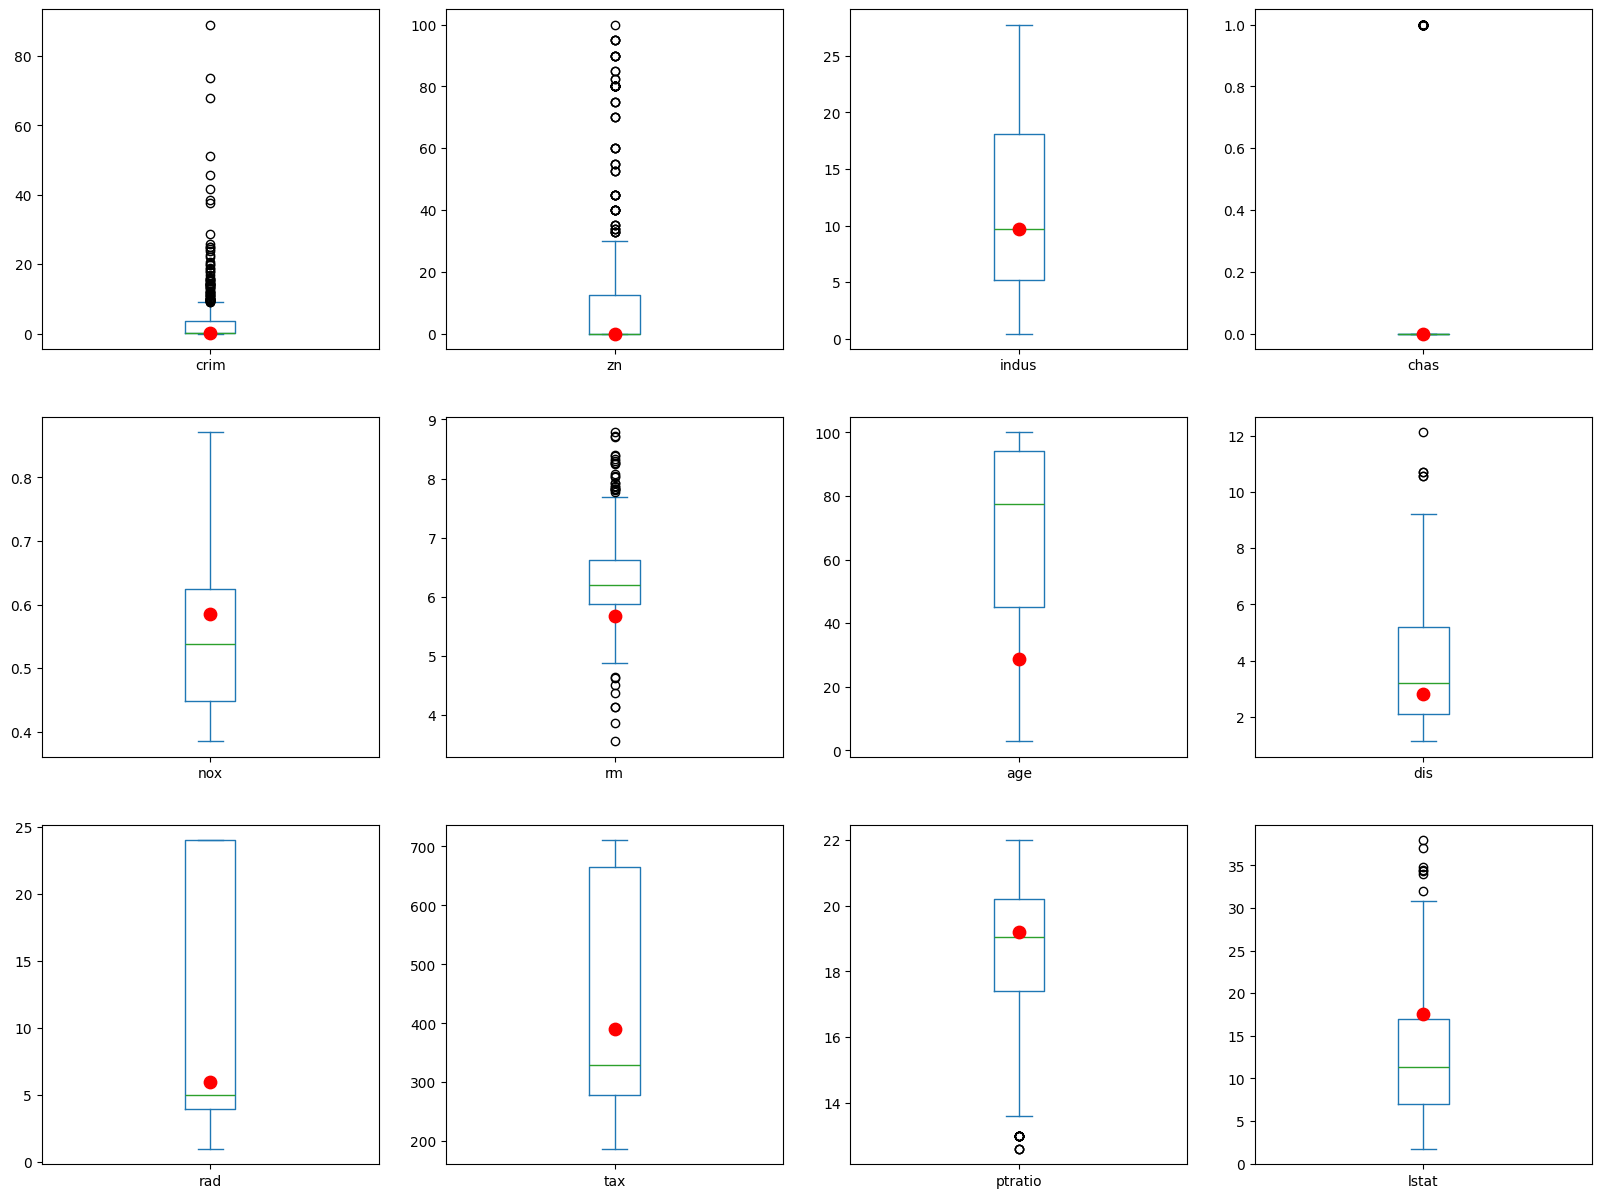

In [66]:
fix, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
for i in range(12):
    
    ax = axes[(i) // 4,(i) % 4]
    # Boston.plot.scatter(x=l[0], y=l[i], ax=ax)
    # ax.set_title(f'{l[0]} vs {l[i]}')
    # ax.set_xlim(0, 20) 
    Boston.plot.box(column=l[i], ax=ax)

# # Value to highlight
    highlight_value = Boston.loc[495, l[i]]  # example: the value in row 10

# # Overlay it with a red point
    ax.scatter(1, highlight_value, color='red', s=80, zorder=3)

plt.show()

In general both neighborhoods have dissimilar behaviors, except the following:

zn= 0 (residential zone) , chas = 0 (Charles river), nox near .65, rm (rooms p dwelling) near 5.5, dis (distance to employmente centear) near 2, ptratio near 20 (pupil teacher).


(i) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.